In [82]:
import numpy as np
import pickle
import time
import os

from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
path = '../food_ai/food-101/images/'
cls_name = []
for i in sorted(os.listdir(path)):
    cls_name.append(i)

pickle.dump(cls_name,open('cls_name','wb'))

In [84]:
encoder = pickle.load(open('cls_name','rb'))
model = load_model('food_ai/data/food101-85.hdf5')
print(len(encoder))

101


In [85]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        list_files = os.listdir(os.path.join(path, i))
        if len(list_files) > 10:
            for f in list_files:
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

In [86]:
test_path = '../food_ai/food-101/test/'
metadata = load_metadata(test_path)
print(len(metadata))

25250


Image Folder: /home/risusanto/Pictures/nasigoreng.jpg
CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 13.4 µs


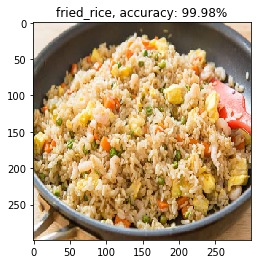

In [176]:
from random import randint

idx = randint(0,len(metadata))
img_class = metadata[idx].name
img_path = metadata[idx].image_path()
img_path = '/home/risusanto/Pictures/nasigoreng.jpg'

img = load_img(img_path,target_size=(299,299))
x = img_to_array(img)
prediction = model.predict(np.expand_dims(x, axis=0))[0]
pred_class = encoder[np.argmax(prediction)]
acc = "%.2f" % (prediction[np.argmax(prediction)] * 100)

print(f'Image Folder: {img_path}')

plt.title(f'{pred_class}, accuracy: {acc}%')
plt.imshow(img)
%time